# Iris dataset: Classification of flowers

In this pattern recognition task, I build a machine learning model to determine the species of an iris flower given morphological information.

The model we will use is Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

## Data Collection and preparation

In [2]:
# Data Collection
data = pd.read_csv("iris.data", header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We notice column names are missing in the dataframe. We can find them in the dataset description (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm and Species). Let's add them to the dataframe in order for better understandability

In [3]:
data.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The Species column is the classification target. However, the data in that column are textual which is inconvenient when applying Linear Regression. We need to change it into *int* data using LabelEncoder

In [4]:
encoder = LabelEncoder()
data.Species = encoder.fit_transform(data.Species)
set(data.Species)

{0, 1, 2}

In [5]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Modeling

In [6]:
# Separate the independant variables from the target variable
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = data.Species.values
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
# Now, let's split them into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                   random_state=4)

# Let's create the logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Evaluation

In this section, we will evaluate our model to see whether it's performing well

In [8]:
# Predictions
predict = model.predict(X_test)

# First, let's see the confusion matrix
confusion_matrix(y_test, predict)

array([[23,  0,  0],
       [ 0, 10,  2],
       [ 0,  1, 14]])

Most of the values are 0s or relatively small, highly concentrated in the diagonal. That indicates the model performed very well on the test set

In [9]:
# Accuracy score (also called subset accuracy)
accuracy_score(y_test, predict)

0.94

The subset accuracy is also very high

In [10]:
# Classification report
print(classification_report(y_test, predict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        23
          1       0.91      0.83      0.87        12
          2       0.88      0.93      0.90        15

avg / total       0.94      0.94      0.94        50



## Visualization

### Displaying the test set

/home/eric/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


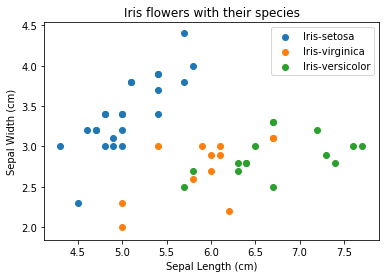

In [13]:
## Visualization of the test set (only using sepal length and width)
classes = set(y_test)
class_names = set(encoder.inverse_transform(y_test))
for name, index in zip(class_names, classes):
    # Select data that belong to that class
    plt.scatter(X_test[y_test == index, 0],X_test[y_test == index, 1], label=name)
plt.title("Iris flowers with their species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()

### Displaying the classification results on the test set

/home/eric/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


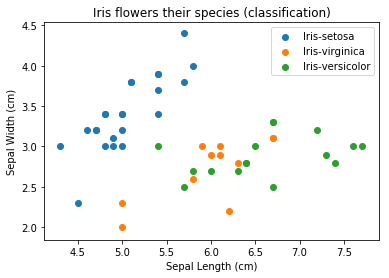

In [14]:
classes = set(predict)
class_names = set(encoder.inverse_transform(predict))
for name, index in zip(class_names, classes):
    plt.scatter(X_test[predict == index, 0], X_test[predict == index, 1],
                label=name)
plt.title("Iris flowers their species (classification)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()

The two plots are almost identical